In [1]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("BTC-Hourly.csv", parse_dates=["date"], index_col="date").iloc[::-1]
data

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2018-05-15 06:00:00,1526364000,BTC/USD,8733.86,8796.68,8707.28,8740.99,4.906603e+06,5.599300e+02
2018-05-15 07:00:00,1526367600,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,2.735800e+02
2018-05-15 08:00:00,1526371200,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02
2018-05-15 09:00:00,1526374800,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02
2018-05-15 10:00:00,1526378400,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03
...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,1646078400,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07
2022-02-28 21:00:00,1646082000,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06
2022-02-28 22:00:00,1646085600,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07


In [5]:
df = data.copy()
df = df[["close", "Volume USD"]]
df.columns = ["Close", "Volume"]
df

,Close,Volume
date,,
2018-05-15 06:00:00,8740.99,5.599300e+02
2018-05-15 07:00:00,8739.00,2.735800e+02
2018-05-15 08:00:00,8728.49,9.177900e+02
2018-05-15 09:00:00,8708.32,1.826200e+02
2018-05-15 10:00:00,8795.90,1.260690e+03
...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07
2022-02-28 21:00:00,41659.53,2.905822e+06
2022-02-28 22:00:00,42907.32,2.263535e+07


In [9]:
df["sma1"] = df.Close.rolling(9).mean()
df["sma2"] = df.Close.rolling(25).mean()
df

,Close,Volume,sma1,sma2
date,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,NaN,NaN
2018-05-15 08:00:00,8728.49,9.177900e+02,NaN,NaN
2018-05-15 09:00:00,8708.32,1.826200e+02,NaN,NaN
2018-05-15 10:00:00,8795.90,1.260690e+03,NaN,NaN
...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,40440.716667,38853.3208
2022-02-28 21:00:00,41659.53,2.905822e+06,40817.205556,39000.5088
2022-02-28 22:00:00,42907.32,2.263535e+07,41356.218889,39220.4012


In [58]:
df["position"] = 0

In [38]:
cond = df["sma1"] > df["sma2"]
cond

date
2018-05-15 06:00:00    False
2018-05-15 07:00:00    False
2018-05-15 08:00:00    False
2018-05-15 09:00:00    False
2018-05-15 10:00:00    False
                       ...  
2022-02-28 20:00:00     True
2022-02-28 21:00:00     True
2022-02-28 22:00:00     True
2022-02-28 23:00:00     True
2022-03-01 00:00:00     True
Length: 33259, dtype: bool

In [59]:
df.loc[cond, "position"] = 1
df

,Close,Volume,sma1,sma2,position,returns,strategy,creturns,cstrategy
date,,,,,,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN,0,NaN,NaN,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,NaN,NaN,0,-0.000228,-0.000228,0.999772,0.999772
2018-05-15 08:00:00,8728.49,9.177900e+02,NaN,NaN,0,-0.001203,-0.001203,0.998570,0.998570
2018-05-15 09:00:00,8708.32,1.826200e+02,NaN,NaN,0,-0.002313,-0.002313,0.996262,0.996262
2018-05-15 10:00:00,8795.90,1.260690e+03,NaN,NaN,0,0.010007,0.010007,1.006282,1.006282
...,...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,40440.716667,38853.3208,1,0.013268,0.000000,4.795220,0.497812
2022-02-28 21:00:00,41659.53,2.905822e+06,40817.205556,39000.5088,1,-0.006113,-0.000000,4.765997,0.497812
2022-02-28 22:00:00,42907.32,2.263535e+07,41356.218889,39220.4012,1,0.029512,0.000000,4.908748,0.497812


In [40]:
df["returns"] = np.log(df.Close.div(df.Close.shift(1)))

In [41]:
df.position.value_counts()

1    17410
0    15849
Name: position, dtype: int64

In [60]:
df["strategy"] = df.returns * df.position.shift(1)
df

,Close,Volume,sma1,sma2,position,returns,strategy,creturns,cstrategy
date,,,,,,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN,0,NaN,NaN,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,NaN,NaN,0,-0.000228,-0.000000,0.999772,0.999772
2018-05-15 08:00:00,8728.49,9.177900e+02,NaN,NaN,0,-0.001203,-0.000000,0.998570,0.998570
2018-05-15 09:00:00,8708.32,1.826200e+02,NaN,NaN,0,-0.002313,-0.000000,0.996262,0.996262
2018-05-15 10:00:00,8795.90,1.260690e+03,NaN,NaN,0,0.010007,0.000000,1.006282,1.006282
...,...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,40440.716667,38853.3208,1,0.013268,0.013268,4.795220,0.497812
2022-02-28 21:00:00,41659.53,2.905822e+06,40817.205556,39000.5088,1,-0.006113,-0.006113,4.765997,0.497812
2022-02-28 22:00:00,42907.32,2.263535e+07,41356.218889,39220.4012,1,0.029512,0.029512,4.908748,0.497812


In [61]:
df[["returns", "strategy"]].sum().apply(np.exp)

returns     4.955076
strategy    9.953716
dtype: float64

In [62]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)
df

,Close,Volume,sma1,sma2,position,returns,strategy,creturns,cstrategy
date,,,,,,,,,
2018-05-15 06:00:00,8740.99,5.599300e+02,NaN,NaN,0,NaN,NaN,NaN,NaN
2018-05-15 07:00:00,8739.00,2.735800e+02,NaN,NaN,0,-0.000228,-0.000000,0.999772,1.000000
2018-05-15 08:00:00,8728.49,9.177900e+02,NaN,NaN,0,-0.001203,-0.000000,0.998570,1.000000
2018-05-15 09:00:00,8708.32,1.826200e+02,NaN,NaN,0,-0.002313,-0.000000,0.996262,1.000000
2018-05-15 10:00:00,8795.90,1.260690e+03,NaN,NaN,0,0.010007,0.000000,1.006282,1.000000
...,...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,41914.97,1.035935e+07,40440.716667,38853.3208,1,0.013268,0.013268,4.795220,9.632598
2022-02-28 21:00:00,41659.53,2.905822e+06,40817.205556,39000.5088,1,-0.006113,-0.006113,4.765997,9.573895
2022-02-28 22:00:00,42907.32,2.263535e+07,41356.218889,39220.4012,1,0.029512,0.029512,4.908748,9.860653


<AxesSubplot:xlabel='date'>

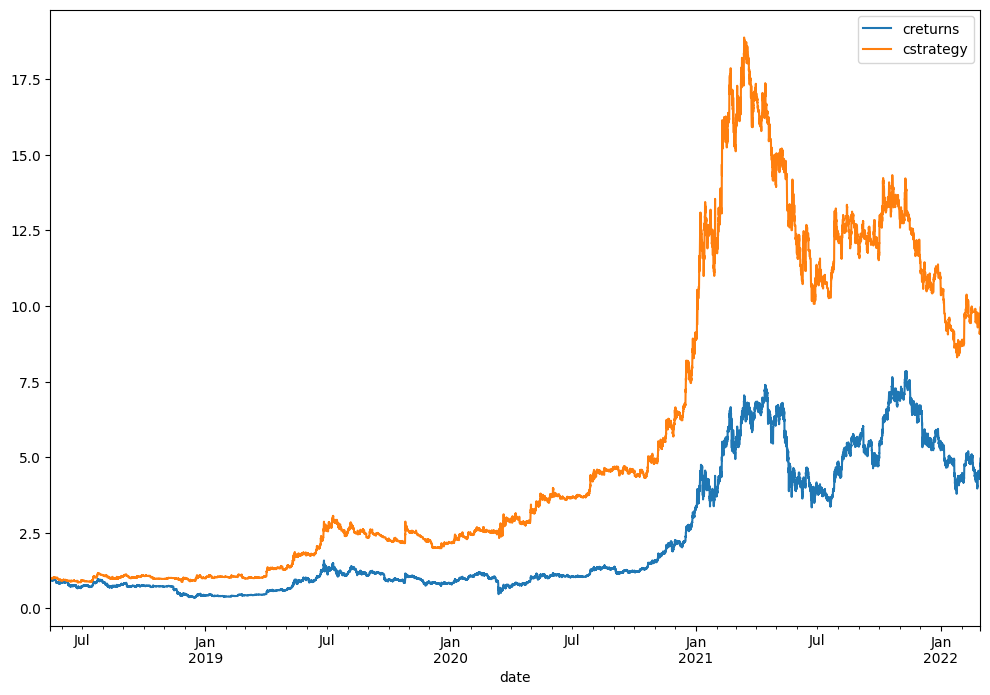

In [63]:
df[["creturns", "cstrategy"]].plot(figsize=(12, 8))

In [6]:
class strategy_tester():
    def __init__(self, filepath, units=1, tc=0.1):
        self.filepath = filepath
        self.units = units
        self.tc = tc

    def get_data(self):
        self.data = pd.read_csv(self.filepath, parse_dates=["date"], index_col="date").iloc[::-1]
        
    def prepare_data(self, sma1, sma2):
        df = self.data[["close", "Volume USD"]].copy()
        df.columns = ["Close", "Volume"]
        df["returns"] = np.log(df.Close.div(df.Close.shift(1)))
        df["sma1"] = df.Close.rolling(sma1).mean()
        df["sma2"] = df.Close.rolling(sma2).mean()
        condition = df.sma1 > df.sma2
        df["position"] = 0
        df.loc[condition, "position"] = 1
    
        self.data = df
    
    def run_backtest(self):
        df = self.data.copy()
        df["strategy"] = df.returns * df.position.shift(1)
        df["trades"] = df.position.diff().fillna(0).abs()  # To calculate fees and shit
        df.strategy = df.strategy + (df.trades * self.tc)  # Calculate fees and shit
        df["creturns"] = df.returns.cumsum().apply(np.exp)
        df["cstrategy"] = df.strategy.cumsum().apply(np.exp)
        self.data = df.copy()
        
    def test_strategy(self, sma1, sma2):
        self.get_data()
        df = self.data
        self.prepare_data(sma1, sma2)
        self.run_backtest()
        
    def optimize_strategy(self, sma1r, sma2r):
        self.datas = []
        performance = []
        combinations = list(product(sma1r, sma2r))
        for comb in combinations:
            self.test_strategy(comb[0], comb[1])
#             self.datas.append(self.data)
            performance.append(self.calc_creturn(self.data))
        self.results_overview =  pd.DataFrame(data=np.array(combinations), columns=["sma1", "sma2"])
        self.results_overview["cstrategy"] = performance
        
    def calc_creturn(self, series):
        return float(series[["strategy"]].sum().apply(np.exp))

In [7]:
tester = strategy_tester("BTC-Hourly.csv", tc=0)

In [8]:
tester.test_strategy(7,20)
tester.data

KeyError: "None of [Index(['close', 'Volume USD'], dtype='object')] are in the [columns]"

In [239]:
tester.data[["returns", "strategy"]].sum().apply(np.exp)

returns     4.955076
strategy    2.614037
dtype: float64

In [297]:
tester.optimize_strategy(range(2, 15), range(10, 40))

In [298]:
tester.results_overview.nlargest(10, "cstrategy")

,sma1,sma2,cstrategy
160,7,20,15.529911
338,13,18,14.577416
366,14,16,14.066250
103,5,23,13.717626
309,12,19,13.670732
280,11,20,13.328236
102,5,22,13.149107
303,12,13,12.786474
368,14,18,12.777051
310,12,20,12.683335


In [299]:
tester.test_strategy(7 ,20)

<AxesSubplot:xlabel='date'>

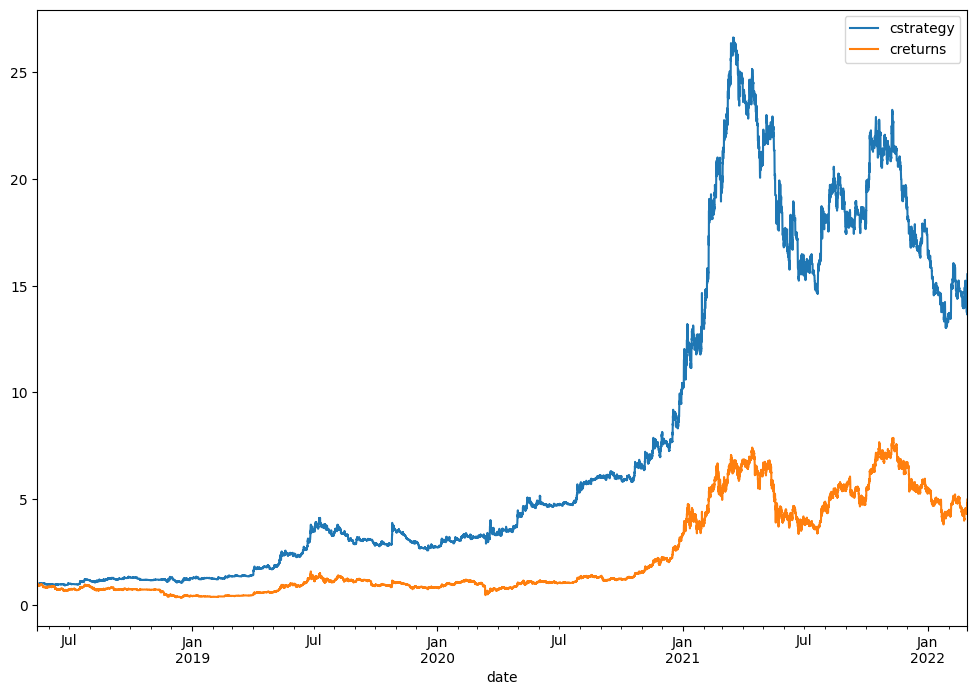

In [300]:
tester.data[["cstrategy", "creturns"]].plot(figsize=(12, 8))